<a href="https://colab.research.google.com/github/airnec/data-science-linear-regression-simple-for-daily-flights/blob/main/linear_regression_simple_for_daily_flight_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adım 1: Gerekli Kütüphaneleri İçe Aktar

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

Adım 2: Veri Setini Yükleyip Ön İşleme Yap

In [13]:
# Örnek bir veri seti oluşturuyorum
data = {
    "Date": pd.date_range(start="2023-01-01", periods=100, freq="D"),  # 100 günlük veri
    "Flights": np.random.randint(800, 1600, size=100)  # Rastgele uçuş sayıları
}
df = pd.DataFrame(data)

# 📌 Tarih formatına çevir ve indeks olarak kullan
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# 📌 Gün sayısını hesapla
df["Days"] = (df.index - df.index.min()).days

# 📌 Bağımsız (X) ve bağımlı değişken (y) belirle
X = df[["Days"]]  # 2D olmalı
y = df["Flights"]

Adım 3: Modeli Eğit ve Test Verisine Tahmin Yap

In [25]:
# 📌 Eğitim ve test veri setlerini ayır (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# 📌 Modeli oluştur ve eğit
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# 📌 Test verisi üzerinde tahmin yap
y_pred = regressor.predict(X_test)
y_pred

array([1233.27088608, 1234.33343882, 1235.39599156, 1236.4585443 ,
       1237.52109705, 1238.58364979, 1239.64620253, 1240.70875527,
       1241.77130802, 1242.83386076, 1243.8964135 , 1244.95896624,
       1246.02151899, 1247.08407173, 1248.14662447, 1249.20917722,
       1250.27172996, 1251.3342827 , 1252.39683544, 1253.45938819])

Adım 4: Modelin Performansını Değerlendir

In [26]:
# 📌 Hata metrikleri
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 244.74
Mean Squared Error (MSE): 71081.04
Root Mean Squared Error (RMSE): 266.61


Adım 5: Tahminleri Görselleştir

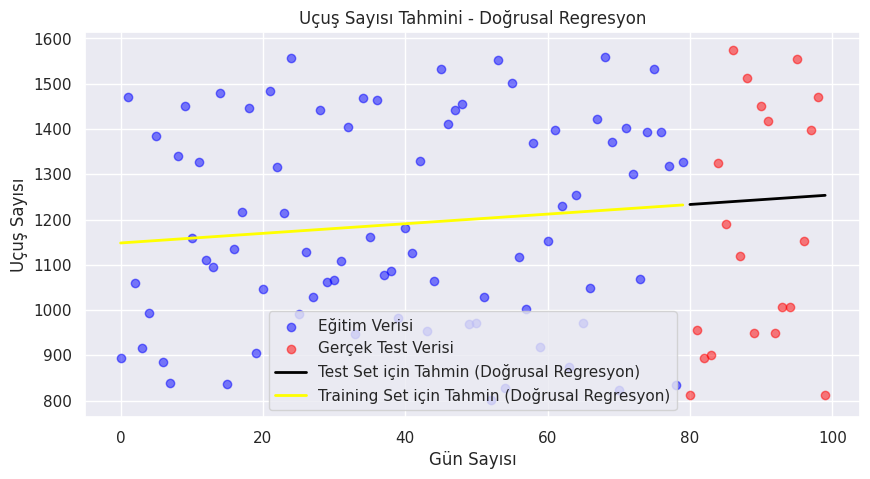

In [28]:
# 📌 Grafik çiz
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label="Eğitim Verisi", color="blue", alpha=0.5)
plt.scatter(X_test, y_test, label="Gerçek Test Verisi", color="red", alpha=0.5)
plt.plot(X_test, y_pred, label="Test Set için Tahmin (Doğrusal Regresyon)", color="black", linewidth=2)
plt.plot(X_train, regressor.predict(X_train), label="Training Set için Tahmin (Doğrusal Regresyon)", color="yellow", linewidth=2)

plt.xlabel("Gün Sayısı")
plt.ylabel("Uçuş Sayısı")
plt.legend()
plt.title("Uçuş Sayısı Tahmini - Doğrusal Regresyon")
plt.show()